# Polinomial Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
# Sample dataset
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6],
    'Exam_Score': [50, 65, 75, 80, 85, 88]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

In [ ]:
# Extract the features (Study_Hours) and target (Exam_Score)
X = df[['Study_Hours']]
y = df['Exam_Score']

# Visualize the data
plt.scatter(X, y, label='Data Points')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')

plt.legend()
plt.title('Polynomial Regression Example')
plt.show()

In [ ]:
# Fit linear regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_pred = lin_reg.predict(X)

# Fit polynomial regression
poly_degree = 10  # Choose the degree (quadratic in this case)
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_pred = poly_reg.predict(X_poly)

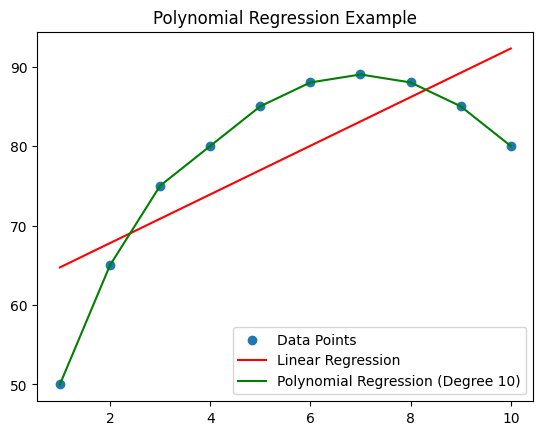

Linear Regression MSE: 61.369696969696975
Polynomial Regression MSE: 3.0637043846669615e-14


In [ ]:
plt.scatter(X, y, label='Data Points')
plt.plot(X, lin_pred, label='Linear Regression', color='red')
plt.plot(X, poly_pred, label=f'Polynomial Regression (Degree {poly_degree})', color='green')
plt.legend()
plt.title('Polynomial Regression Example')
plt.show()
# Evaluate the models
lin_mse = mean_squared_error(y, lin_pred)
poly_mse = mean_squared_error(y, poly_pred)
print(f'Linear Regression MSE: {lin_mse}')
print(f'Polynomial Regression MSE: {poly_mse}')

# Exponential regression

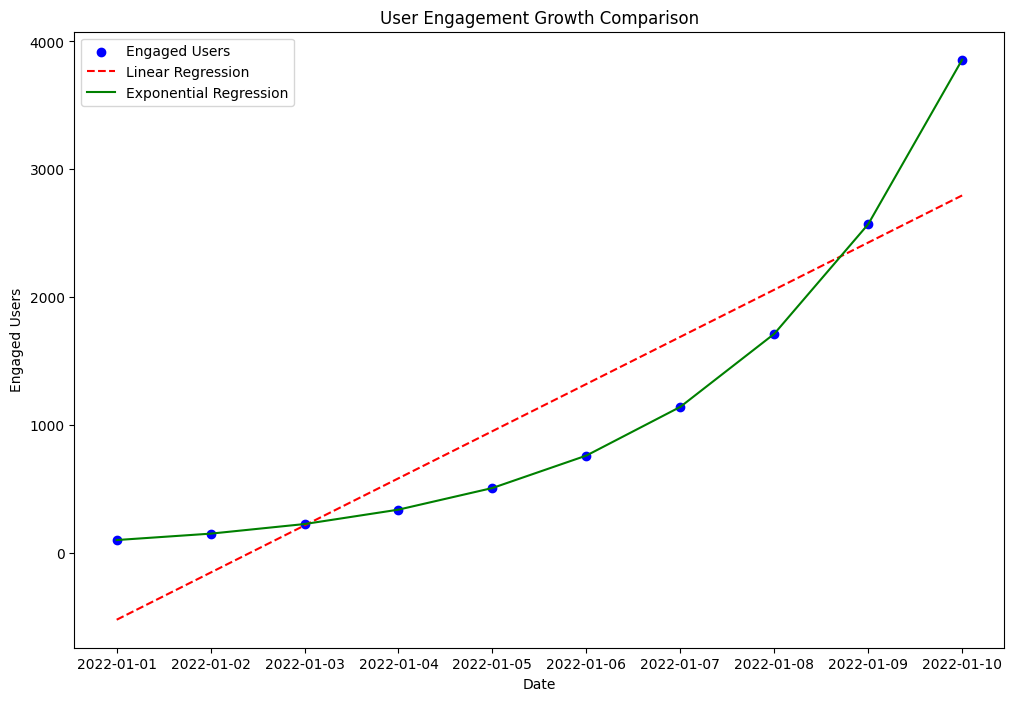

Linear Regression MSE: 261371.25333333333
Exponential Regression MSE: 0.3845637617704857


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Sample dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100, 150, 225, 338, 507, 761, 1142, 1713, 2570, 3855]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the features (Date) and target (Engaged_Users)
X = df['Date'].values.astype(float).reshape(-1, 1)
y = df['Engaged_Users']

# Visualize the data
plt.figure(figsize=(12, 8))
plt.scatter(df['Date'], y, label='Engaged Users', color='blue')
plt.xlabel('Date')
plt.ylabel('Engaged Users')

# Fit linear regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_pred = lin_reg.predict(X)
plt.plot(df['Date'], lin_pred, label='Linear Regression', color='red', linestyle='--')

# Fit exponential regression
exp_reg = LinearRegression()
X_exp = np.arange(len(X)).reshape(-1, 1)
exp_reg.fit(X_exp, np.log(y))  # Fit on the log of y for exponential model
exp_pred = np.exp(exp_reg.predict(X_exp))
plt.plot(df['Date'], exp_pred, label='Exponential Regression', color='green')

plt.legend()
plt.title('User Engagement Growth Comparison')
plt.show()

# Evaluate the models
lin_mse = mean_squared_error(y, lin_pred)
exp_mse = mean_squared_error(y, exp_pred)
print(f'Linear Regression MSE: {lin_mse}')
print(f'Exponential Regression MSE: {exp_mse}')


# Power models

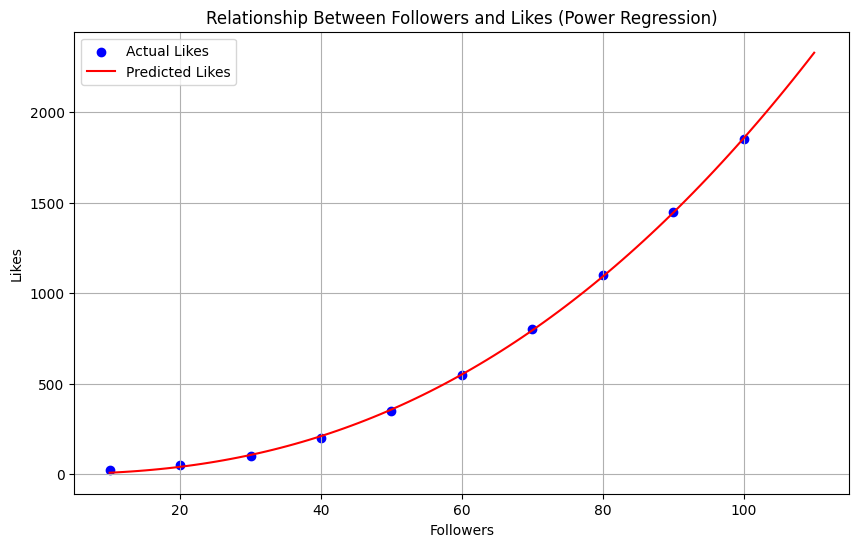

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the sample data
data = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25, 50, 100, 200, 350, 550, 800, 1100, 1450, 1850],
    'Shares': [5, 10, 20, 40, 70, 110, 160, 220, 290, 370],
    'Comments': [2, 4, 8, 16, 28, 44, 64, 88, 116, 148]
}
df = pd.DataFrame(data)

# Perform power regression for Likes as an example
from scipy.optimize import curve_fit

def power_function(x, a, b):
    return a * np.power(x, b)

likes_params, _ = curve_fit(power_function, df['Followers'], df['Likes'])

# Generate a range of Followers values for the fitted curve
followers_range = np.linspace(10, 110, 100)

# Calculate the predicted Likes using the fitted parameters
predicted_likes = power_function(followers_range, *likes_params)

# Create a plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['Followers'], df['Likes'], label='Actual Likes', color='blue')
plt.plot(followers_range, predicted_likes, label='Predicted Likes', color='red')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Relationship Between Followers and Likes (Power Regression)')
plt.legend()
plt.grid(True)
plt.show()
